In [1]:
import os 
import shutil

In [2]:
os.getcwd()

'C:\\Users\\Conan\\gp project'

In [3]:
path  = r'E:\Courses\self driving car udemy\5- computer vision finding lanes'

In [4]:
os.listdir(path)

['54-grayscale converstion.MP4',
 '55-gussain filter.MP4',
 '56-simpile edge detection.MP4',
 '57-binary number and bitwise.MP4',
 '58-region of interest.MP4',
 '59-Hough man 1.MP4',
 '60- Hough man 2.MP4',
 '61-optmizing.MP4',
 '63-finding line in video.MP4',
 '64-code.txt',
 'Image',
 'Image.zip',
 'test2',
 'test2.mp4.zip']

In [5]:
os.mkdir(path+r"\Image")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:\\Courses\\self driving car udemy\\5- computer vision finding lanes\\Image'

In [1]:
shutil.unpack_archive(path+r"\Image.zip",path+r'\Image','zip')

NameError: name 'shutil' is not defined

In [12]:
os.mkdir(path+r"\test2")

In [13]:
#shutil.unpack_archive(path+r'test2.mp4.zip',path+r'\test2','zip')

ReadError: E:\Courses\self driving car udemy\5- computer vision finding lanestest2.mp4.zip is not a zip file

In [5]:
import cv2
import numpy as np

In [6]:
path = path +r'\Image'

In [7]:
path

'E:\\Courses\\self driving car udemy\\5- computer vision finding lanes\\Image'

In [8]:
os.listdir(path)

['Image', '__MACOSX']

In [9]:
path = path+r'\Image'

In [10]:
path

'E:\\Courses\\self driving car udemy\\5- computer vision finding lanes\\Image\\Image'

In [11]:
os.listdir(path)

['test_image.jpg']

In [12]:
image = cv2.imread(path+r"\test_image.jpg")
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
type(image)

numpy.ndarray

In [14]:
lane_image = np.copy(image)

In [15]:
gray = cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)

In [16]:
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
blur = cv2.GaussianBlur(gray,(5,5),0)
cv2.imshow("image",blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
def canny(image):
    gary = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

In [19]:
canny_image = canny(image)

In [20]:
cv2.imshow("image",canny_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
import matplotlib.pyplot as plt

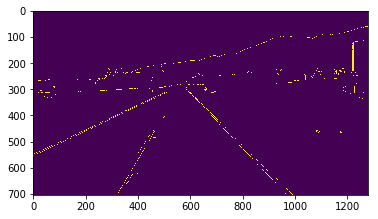

In [22]:
plt.imshow(canny_image)
plt.show()

In [23]:
def region_of_interest(image):
    hight = image.shape[0]
    triangle = np.array([[(200,hight),(1100,hight),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)
    croped_image = cv2.bitwise_and(image,mask)
    return croped_image

In [24]:
cropped_image = region_of_interest(canny_image)
cv2.imshow("image",cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
lines = cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40 ,maxLineGap=5)

In [26]:
def desplay_lines(image,lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(lines_image,(x1,y1),(x2,y2),(255,0,255),10)
    return lines_image

In [27]:
line_image = desplay_lines(lane_image,lines)

In [28]:
cv2.imshow("image",line_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
combo_image = cv2.addWeighted(lane_image,0.8,line_image,1,1)

In [30]:
cv2.imshow("image",combo_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# get it togther 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

In [ ]:
def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines

In [ ]:
def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    canny = cv2.Canny(gray, 50, 150)
    return canny

In [ ]:
def region_of_interest(canny):
    height = canny.shape[0]
    width = canny.shape[1]
    mask = np.zeros_like(canny)
 
    triangle = np.array([[
    (200, height),
    (550, 250),
    (1100, height),]], np.int32)
 
    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image

In [ ]:
def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image

In [ ]:
image = cv2.imread(r"E:\Courses\self driving car udemy\5- computer vision finding lanes\Image\Image\test_image.jpg")
lane_image = image.copy()
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40 ,maxLineGap=5)
avarage_lines = average_slope_intercept(lane_image,lines)
lines_image = display_lines(lane_image,avarage_lines)
image = cv2.addWeighted(image,0.8,lines_image,1,1)

In [ ]:
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
cap = cv2.VideoCapture(r"E:\Courses\self driving car udemy\5- computer vision finding lanes\test2\test2.mp4")
while(cap.isOpened()):
    _,frame = cap.read()
    lane_image = frame.copy()
    canny_image = canny(lane_image)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40 ,maxLineGap=5)
    avarage_lines = average_slope_intercept(lane_image,lines)
    lines_image = display_lines(lane_image,avarage_lines)
    frame = cv2.addWeighted(frame,0.8,lines_image,1,1)
    cv2.imshow("video",frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Conan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Conan\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: 'numpy.float64' object is not iterable